In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [14]:
df = pd.read_csv(r"C:\Users\priya\Downloads\synthetic_insurance_data (1).csv")

In [15]:
df.dropna(inplace=True)

In [16]:

if 'Customer_ID' in df.columns:
    df.drop(columns=['Customer_ID'], inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 500 non-null    int64  
 1   Annual_Income       500 non-null    int64  
 2   Policy_Count        500 non-null    int64  
 3   Total_Premium_Paid  500 non-null    int64  
 4   Claim_Frequency     500 non-null    float64
 5   Policy_Upgrades     500 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 23.6 KB


In [19]:
df.describe()

,Age,Annual_Income,Policy_Count,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades
count,500.000000,5.000000e+02,500.000000,500.00000,500.000000,500.000000
mean,44.220000,1.338119e+06,2.450000,81163.68800,2.417760,0.972000
std,15.036082,6.584806e+05,1.092652,39697.37157,1.421895,0.827397
min,18.000000,2.004040e+05,1.000000,10281.00000,0.000000,0.000000
25%,32.000000,7.748822e+05,1.000000,45337.75000,1.140000,0.000000
50%,45.000000,1.309080e+06,2.000000,83453.00000,2.415000,1.000000
75%,57.000000,1.874450e+06,3.000000,115364.00000,3.672500,2.000000
max,69.000000,2.499998e+06,4.000000,149999.00000,4.980000,2.000000


c:\Users\priya\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


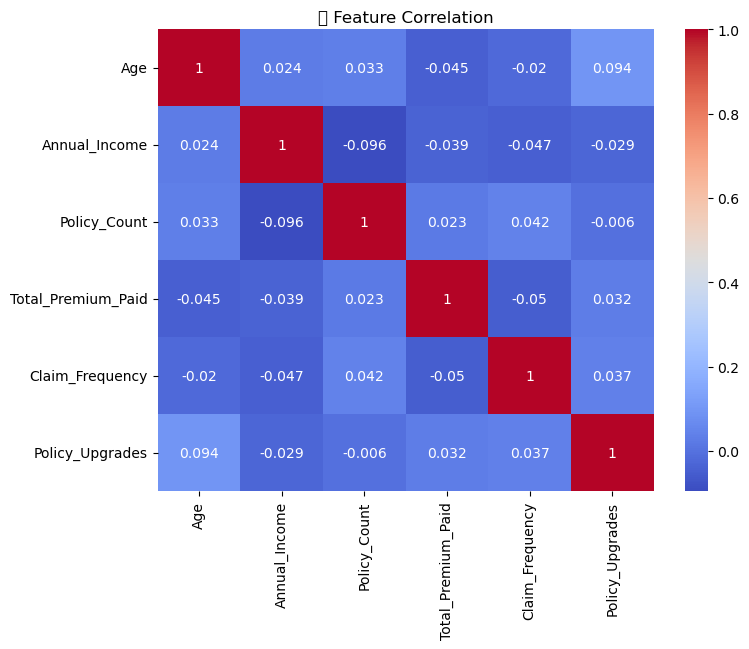

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("🔍 Feature Correlation")
plt.show()

In [21]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [22]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(pca_data, columns=["PC1", "PC2"])


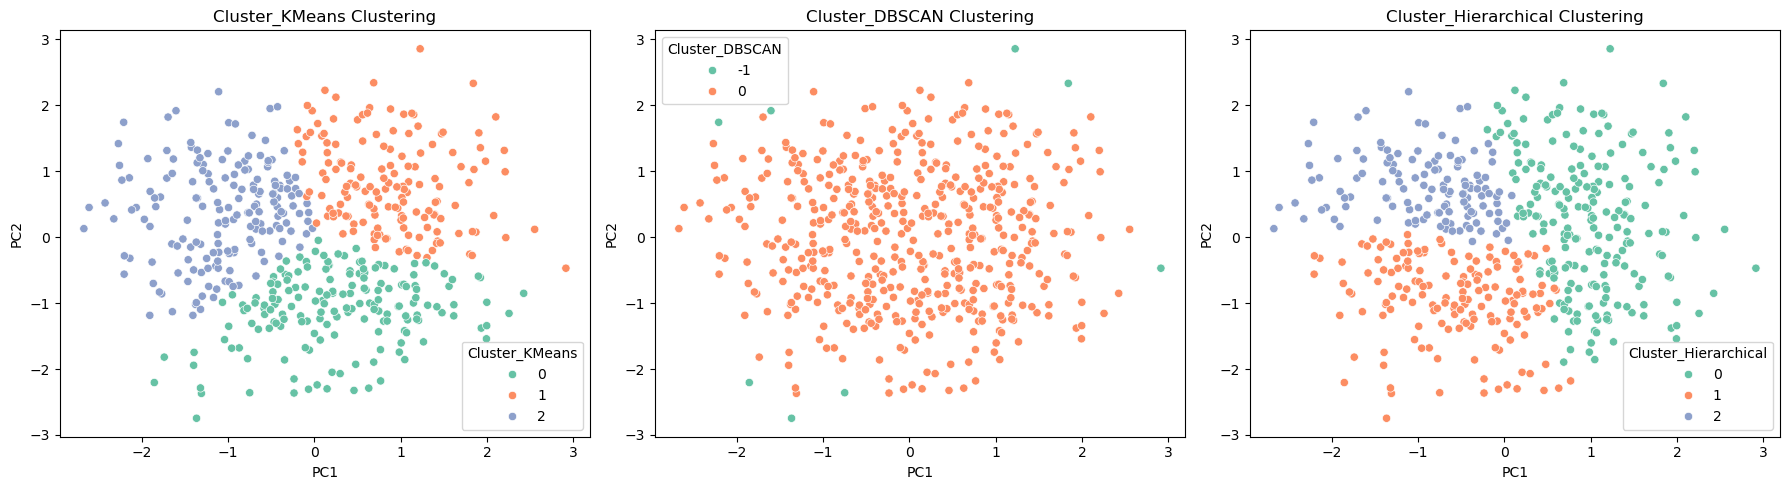

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, method in enumerate(["Cluster_KMeans", "Cluster_DBSCAN", "Cluster_Hierarchical"]):
    sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue=method, palette="Set2", ax=axes[i])
    axes[i].set_title(f"{method} Clustering")

plt.tight_layout()
plt.show()

In [23]:
inertias = []
k_range = range(2, 11)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(pca_data)
    inertias.append(km.inertia_)

c:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

c:\Users\priya\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


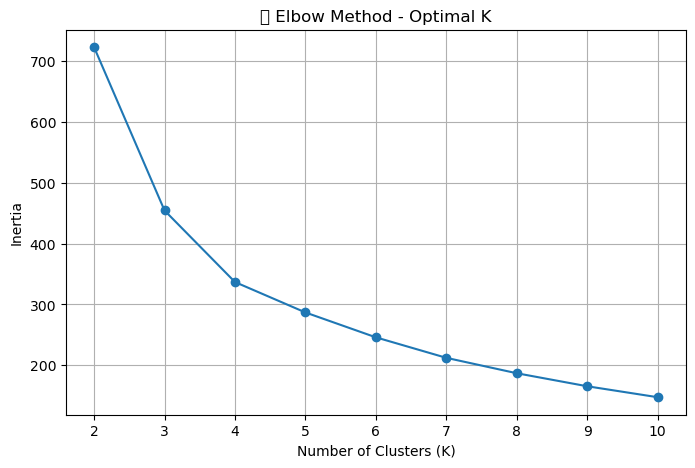

In [24]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("📉 Elbow Method - Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [25]:

k = 3
model = KMeans(n_clusters=k, random_state=42)


In [26]:

labels = model.fit_predict(pca_data)
df_pca['Cluster'] = labels

c:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\priya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [27]:
score = silhouette_score(pca_data, labels)
print(f"✅ Silhouette Score: {score:.3f}")

✅ Silhouette Score: 0.371


c:\Users\priya\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


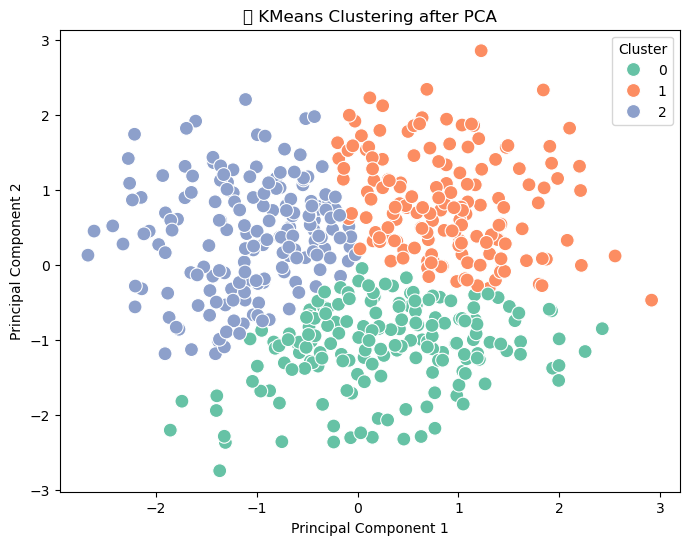

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster", palette="Set2", s=100)
plt.title("🎯 KMeans Clustering after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()


In [29]:
df['Cluster'] = labels
df.to_csv("clustered_insurance_output.csv", index=False)
print("✅ Output saved to clustered_insurance_output.csv")

✅ Output saved to clustered_insurance_output.csv
